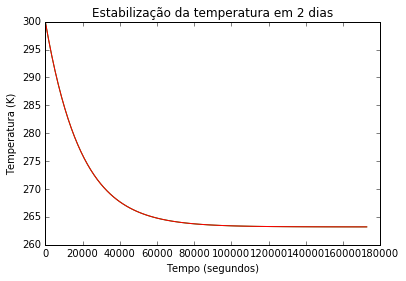

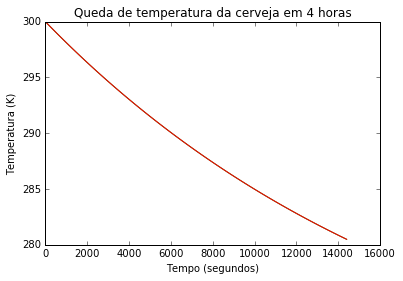

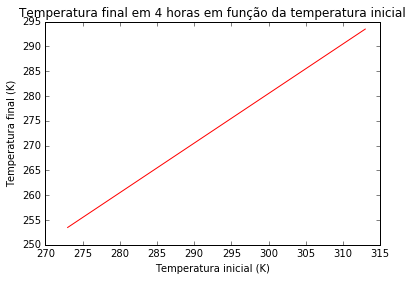

[0.0, 526.00730565702304, 1066.0148057611912, 1622.0225280906682, 2194.0304726454538, 2786.0386949818749, 3394.0471395436052, 4024.0558896651346, 4674.0649175683002, 5348.0742788094285, 6046.0839733885196, 6772.0940568619017, 7526.104529229573, 8310.1154182696991, 9128.1267795386048, 9984.1386685926209, 10880.151113209906, 11818.164141168629, 12806.177863581439, 13850.192363782831, 14952.207669550968, 16122.223919776665, 17370.241253350741, 18704.259781385856, 20138.279698329145, 21690.301254184087, 23378.324698954155, 25232.350449311798, 27286.378977485801, 29586.410922373925, 32204.447283990059, 35240.489451242378, 38852.539618605821, 43312.601563910612, 49148.682620591957, 57598.799983333105, 73155.016041889481]
[273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309]


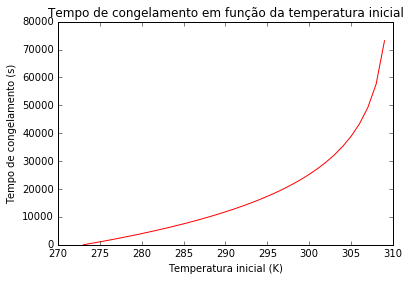

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint
from numpy import linspace

# Todas os números se encontram nas unidades do S.I.

# Em primeiro lugar, definimos as características físicas do ar, da cerveja e dos condutores de energia

Llata = 0.0005 # expessuras
Lfreezer = 0.06

diametrolata = 0.065 # diâmetro da lata

Llata1 = diametrolata * 4 # consideramos que as latas formam um bloco de 4 x 3 diâmetros (pack de 12 unidades)
Llata2 = diametrolata * 3
Llata3 = 0.12

Lfreezer1 = 0.68 # lados do freezer
Lfreezer2 = 0.76
Lfreezer3 = 0.60

Alata = (Llata1 * Llata2) * 2 + (Llata2 * Llata3) * 2 + (Llata1 * Llata3) * 2 # áreas totais para a dissipação de energia
Afreezer = (Lfreezer1 * Lfreezer2) * 2 + (Lfreezer1 * Lfreezer3) * 2 + (Lfreezer2 * Lfreezer3) * 2

Vcerveja = Llata1 * Llata2 * Llata3 # volumes
Var = (Lfreezer1 * Lfreezer2 * Lfreezer3) - Vcerveja

Dcerveja = 1030 # densidades
Dar = 1.2

Mc = Dcerveja * Vcerveja # massas
Ma = Dar * Var

Klata = 237 # constantes de condutividade térmica
Kfreezer = 0.03

Cc = 4200 # calores específicos
Ca = 1.008

Potencia = 250

Eficiencia = 0.2

Potenciareal = Potencia * Eficiencia

Ta0 = 300
Tc0 = 300
Te0 = 300

Y0 = [Tc0, Ta0]

def funcao(Y,t):
    dTcdt = -((Y[0] - Y[1]) * (Alata * Klata) / (Llata * Mc * Cc))
    dTadt = ((Y[0] - Y[1]) * (Alata * Klata) / (Llata * Ma * Ca)) + (((Te0 - Y[1]) * (Afreezer * Kfreezer)) / (Lfreezer * Ma * Ca)) - (Potenciareal / Ma * Ca)
   
    return dTcdt, dTadt

t = linspace(0, 3600 * 24 * 2, 100)

Y = odeint(funcao, Y0, t)

plt.plot(t,Y[:,1],'g')
plt.plot(t,Y[:,0],'r')
plt.ylabel('Temperatura (K)')
plt.xlabel('Tempo (segundos)')
plt.title(r'Estabilização da temperatura em 2 dias')
plt.show()

Y0 = [Tc0, Ta0]
t = linspace(0, 3600 * 4, 100)

Y = odeint(funcao, Y0, t)

plt.plot(t,Y[:,1],'g')
plt.plot(t,Y[:,0],'r')
plt.ylabel('Temperatura (K)')
plt.xlabel('Tempo (segundos)')
plt.title(r'Queda de temperatura da cerveja em 4 horas')
plt.show()

Ta0 = 273
Tc0 = 273
Te0 = 273

listaTfinal = []
listaTinicial = []

for i in range(41):
    Y0 = [Tc0, Ta0]
    t = linspace(0, 3600 * 4, 100)
    Y = odeint(funcao, Y0, t)
    listaTfinal.append(min(Y[:,0]))
    listaTinicial.append(Te0)
    Ta0 += 1
    Tc0 += 1
    Te0 += 1
    
plt.plot(listaTinicial, listaTfinal, 'r')
plt.ylabel('Temperatura final (K)')
plt.xlabel('Temperatura inicial (K)')
plt.title(r'Temperatura final em 4 horas em função da temperatura inicial')
plt.show()

listaTempo = []
listaTemperaturas = []

Ta0 = 273
Tc0 = 273
Te0 = 273

for Celsius in range(81):
    Y0 = [Tc0, Ta0]
    t = linspace(0, 3600 * 40, 3600 * 20)
    Y = odeint(funcao, Y0, t)
    for Kelvin in range(len(Y[:,0])):
        if Y[:,0][Kelvin] <= 273:
            listaTempo.append(t[Kelvin])
            listaTemperaturas.append(Ta0)
            break
    Tc0 += 1
    Ta0 += 1
    Te0 += 1
    
print(listaTempo)
print(listaTemperaturas)

plt.plot(listaTemperaturas, listaTempo, 'r')
plt.ylabel('Tempo de congelamento (s)')
plt.xlabel('Temperatura inicial (K)')
plt.title(r'Tempo de congelamento em função da temperatura inicial')
plt.show()